In [24]:
import spacy
import matplotlib.pyplot as plt
from docx import Document

In [25]:
nlp = spacy.load("en_core_web_md")

In [26]:
document = Document('./../Linss-Lukas-ba.docx') # ./../Linss-Lukas-ba.docx

In [27]:
paragraphs = document.paragraphs
text = ''

for i, p in enumerate(paragraphs):
    if len(p.text) > 100:
        text += p.text

In [28]:
doc = nlp(text)

In [29]:
named_ents_dic = {}
for ent in doc.ents:
    if ent.label_ in named_ents_dic:
        named_ents_dic[ent.label_] += 1
    else:
        named_ents_dic[ent.label_] = 1

In [30]:
sorted_ents_dic = {k: v for k, v in sorted(named_ents_dic.items(), key=lambda item: item[1], reverse=True)}
print(sorted_ents_dic)

{'ORG': 231, 'CARDINAL': 158, 'DATE': 73, 'PERSON': 50, 'LOC': 28, 'ORDINAL': 20, 'PERCENT': 18, 'GPE': 14, 'PRODUCT': 11, 'NORP': 11, 'MONEY': 10, 'WORK_OF_ART': 4, 'TIME': 4, 'QUANTITY': 3, 'LAW': 3, 'FAC': 2}


In [31]:
from spacy import displacy
#displacy.render(doc, style='ent')

In [32]:
import pandas as pd

data = {'Named Entities': list(sorted_ents_dic.keys()),
        'Found in Document' : list(sorted_ents_dic.values())
        }

df = pd.DataFrame(data=data)

In [33]:
print(df.head())

  Named Entities  Found in Document
0            ORG                231
1       CARDINAL                158
2           DATE                 73
3         PERSON                 50
4            LOC                 28


In [34]:
total_entities = df['Found in Document'].sum()
percentage = [x / total_entities for x in df['Found in Document'].tolist()]
df['Percentage'] = percentage

In [35]:
data = [ent + ': ' + spacy.explain(ent) for ent in df['Named Entities'].tolist()]
df.insert(1, 'Definition', data)

In [36]:
df.to_excel('Named_Entities.xlsx')

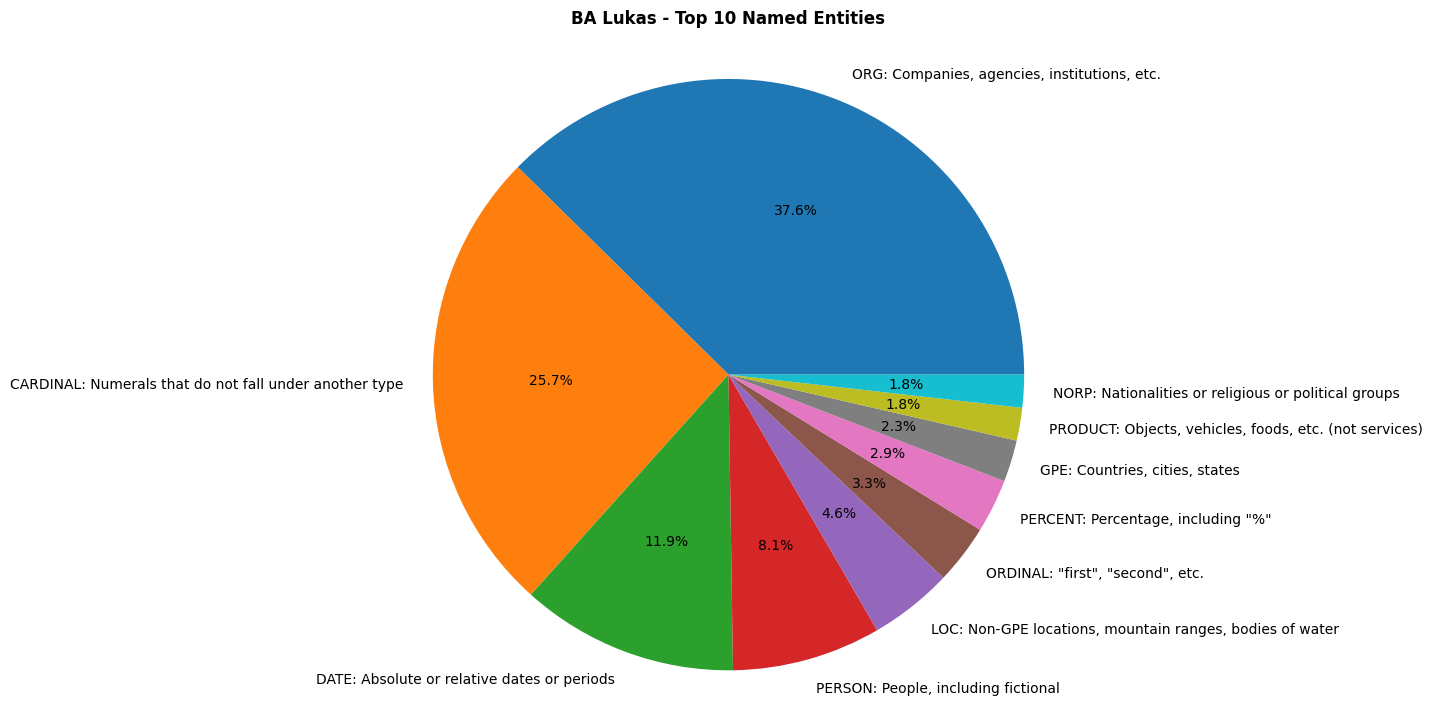

In [38]:
labels = df['Named Entities'].tolist()[0:10]
definitions = df['Definition'].tolist()[0:10]
percentage = df['Percentage'].tolist()[0:10]

fig, ax = plt.subplots()
plt.title("BA Lukas - Top 10 Named Entities", fontweight='bold' ,pad=120)
ax.pie(percentage, labels=definitions, autopct='%1.1f%%', radius=2)
plt.show()